In [1]:
import yaml
import os 

from src import preprocess, wda, diags

## Open configuration file

In [2]:
with open("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)
config

{'path_movie': 'data/current_observation.mp4',
 'dir_tmp': 'scratch',
 'dir_out': 'output',
 'file_out': 'currents.nc',
 'resolution_movie': 0.0342,
 'fps': 10,
 'band': 0,
 'flag_downscale_movie': True,
 'downscaling': 3,
 'num_pixels': 128,
 'accuracy': 0.01,
 'ulim': [-0.5, 0.5],
 'vlim': [-0.5, 0.5],
 'du': 0.1,
 'dv': 0.1,
 'norm': False,
 'w0': 0.6,
 'w1': 0.9,
 'ub': 0.0,
 'vb': 0.0,
 'num_threads': 16}

## Preprocessing

In [6]:
dir_tmp = config['dir_tmp']
input_file = config['path_movie']
fps = config['fps']
png_files_pattern = os.path.join(dir_tmp,f"{os.path.split(input_file)[-1][:-4]}_fps-{fps}")
band = config['band']
flag_downscale_movie = config['flag_downscale_movie']
downscaling = config['downscaling']
if downscaling is None or downscaling<1:
    downscaling = 1
resolution_movie = config['resolution_movie']

num_threads = config['num_threads']

In [3]:
if not os.path.exists(dir_tmp):
    os.makedirs(dir_tmp)

In [4]:
preprocess.MP4toPNG(input_file, png_files_pattern, fps)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [5]:
preprocess.run_preprocess(png_files_pattern, band, flag_downscale_movie, downscaling, resolution_movie, num_threads, fps, dir_tmp)

## Current velocities estimation

In [3]:
num_pixels = config['num_pixels']
ulim = config['ulim']
vlim = config['vlim']
du = config['du']
dv = config['dv']
w0 = config['w0']
w1 = config['w1']
accuracy = config['accuracy']
norm = config['norm']
dir_out = config['dir_out']
file_out = config['file_out']

In [7]:
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [8]:
wda.run_current_estimation(f'{dir_tmp}/data.nc', num_pixels, ulim, vlim, du, dv, accuracy, w0, w1, num_threads, norm, f'{dir_out}/{file_out}')

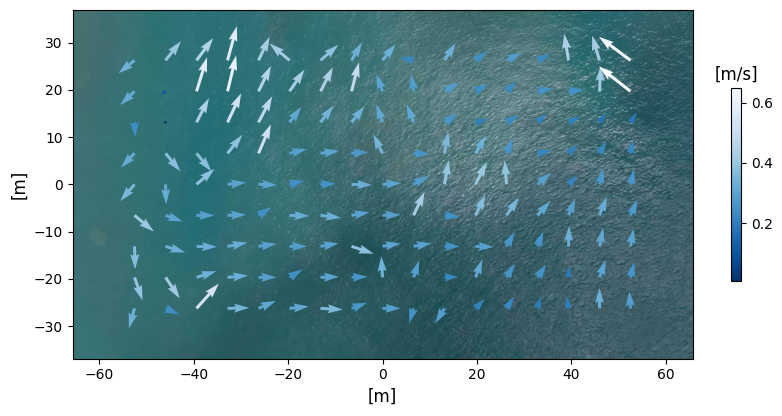

In [7]:
%matplotlib inline
diags.plot_current_map(png_files_pattern, resolution_movie, f'{dir_out}/{file_out}')